In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DCOILWTICO.csv')
df

,DATE,DCOILWTICO
0,2017-06-27,44.25
1,2017-06-28,44.74
2,2017-06-29,44.88
3,2017-06-30,46.02
4,2017-07-03,.
...,...,...
1300,2022-06-21,110.49
1301,2022-06-22,106.22
1302,2022-06-23,105.75
1303,2022-06-24,109.07


In [3]:
data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 01, 2022",105.41,106.30,106.72,105.33,-,-0.33%
1,"Jun 30, 2022",105.76,109.70,110.45,105.10,362.89K,-3.66%
2,"Jun 29, 2022",109.78,111.86,114.05,109.22,322.06K,-1.77%
3,"Jun 28, 2022",111.76,110.18,112.22,109.62,306.75K,2.00%
4,"Jun 27, 2022",109.57,107.22,110.54,105.60,282.91K,1.81%


In [4]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
data.describe(include='all')

,Date,Price,Open,High,Low,Vol.,Change %
count,4906,4906.000000,4906.000000,4906.000000,4906.000000,4906,4906
unique,4906,NaN,NaN,NaN,NaN,4598,1072
top,"Mar 08, 2010",NaN,NaN,NaN,NaN,-,0.97%
freq,1,NaN,NaN,NaN,NaN,107,20
mean,NaN,67.998526,68.003062,69.027246,66.899289,NaN,NaN
std,NaN,23.539850,23.511689,23.721167,23.294412,NaN,NaN
min,NaN,-37.630000,-14.000000,13.690000,-40.320000,NaN,NaN
25%,NaN,49.620000,49.600000,50.442500,48.800000,NaN,NaN
50%,NaN,63.855000,63.860000,64.780000,63.015000,NaN,NaN
75%,NaN,87.262500,87.410000,88.517500,86.057500,NaN,NaN


In [6]:
data['High'].max()

147.27

In [7]:
data[data['High']==147.27]

,Date,Price,Open,High,Low,Vol.,Change %
3623,"Jul 11, 2008",145.08,141.8,147.27,141.44,334.94K,2.42%


In [8]:
data['Low'].min(0)

-40.32

In [9]:
data[data['Low']==-40.32]

,Date,Price,Open,High,Low,Vol.,Change %
580,"Apr 20, 2020",-37.63,17.73,17.85,-40.32,247.95K,-305.97%


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-07-01,105.41,106.30,106.72,105.33,-,-0.33%
1,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%
2,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%
3,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%
4,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%
...,...,...,...,...,...,...,...
4901,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%
4902,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%
4903,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%
4904,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%


In [11]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [12]:
data = data[::-1].reset_index(drop=True)
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%
...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%
4902,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%
4903,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%
4904,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%


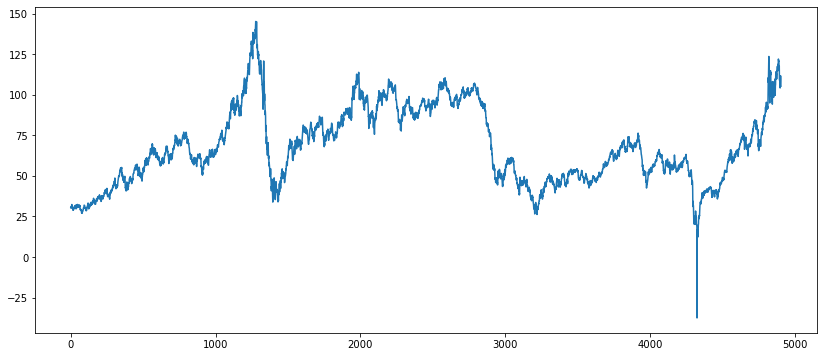

In [16]:
plt.figure(figsize=(14,6))
plt.plot(data['Price'])
plt.show()

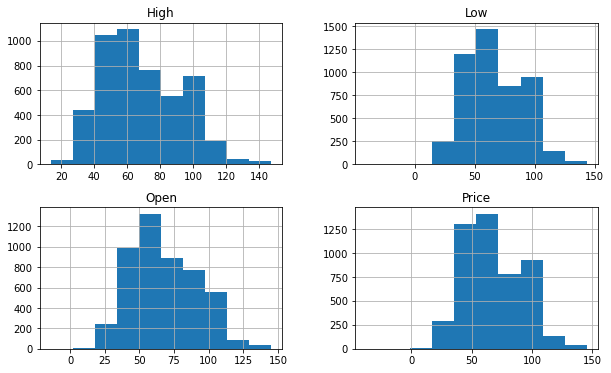

In [17]:
data.hist(figsize=(10,6))
plt.show()